In [ ]:
# Data Collection

import pandas_datareader as pdr

In [ ]:
key = 'b9e9e3f8c71f81de9bbcee0519d0e6456f9724a3'

df = pdr.get_data_tiingo('GOOG', api_key=key)

<ipython-input-3-e640ae63329f>:3: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df = pdr.get_data_tiingo('GOOG', api_key=key)


In [ ]:
df.to_csv('GOOG.csv')

In [ ]:
# read csv
import pandas as pd

df = pd.read_csv('GOOG.csv')

In [ ]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2018-08-13 00:00:00+00:00,1235.01,1249.273,1233.641,1236.98,997346,61.7505,62.46365,61.68205,61.8490,19946920,0.0,1.0
1,GOOG,2018-08-14 00:00:00+00:00,1242.10,1245.870,1225.110,1235.19,1348194,62.1050,62.29350,61.25550,61.7595,26963880,0.0,1.0
2,GOOG,2018-08-15 00:00:00+00:00,1214.38,1235.240,1209.510,1229.26,1828814,60.7190,61.76200,60.47550,61.4630,36576280,0.0,1.0
3,GOOG,2018-08-16 00:00:00+00:00,1206.49,1226.000,1202.550,1224.73,1343161,60.3245,61.30000,60.12750,61.2365,26863220,0.0,1.0
4,GOOG,2018-08-17 00:00:00+00:00,1200.96,1209.020,1188.240,1202.03,1389645,60.0480,60.45100,59.41200,60.1015,27792900,0.0,1.0


In [ ]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,GOOG,2023-08-07 00:00:00+00:00,131.94,132.060,129.430,129.510,17621041,131.94,132.060,129.430,129.510,17621041,0.0,1.0
1254,GOOG,2023-08-08 00:00:00+00:00,131.84,131.940,130.130,130.980,16835952,131.84,131.940,130.130,130.980,16835952,0.0,1.0
1255,GOOG,2023-08-09 00:00:00+00:00,130.15,132.470,129.505,132.190,17745218,130.15,132.470,129.505,132.190,17745218,0.0,1.0
1256,GOOG,2023-08-10 00:00:00+00:00,130.21,132.647,130.035,131.970,17855681,130.21,132.647,130.035,131.970,17855681,0.0,1.0
1257,GOOG,2023-08-11 00:00:00+00:00,130.17,130.440,128.750,129.202,15205465,130.17,130.440,128.750,129.202,15205465,0.0,1.0


In [ ]:
# Data available from 13th Aug 2018 to 10th Aug 2023

# Data prediction here is done on 'close'

data = df.reset_index()['close']
data.head()

0    1235.01
1    1242.10
2    1214.38
3    1206.49
4    1200.96
Name: close, dtype: float64

In [ ]:
data

0       1235.01
1       1242.10
2       1214.38
3       1206.49
4       1200.96
         ...   
1253     131.94
1254     131.84
1255     130.15
1256     130.21
1257     130.17
Name: close, Length: 1258, dtype: float64

In [ ]:
data.shape

(1258,)

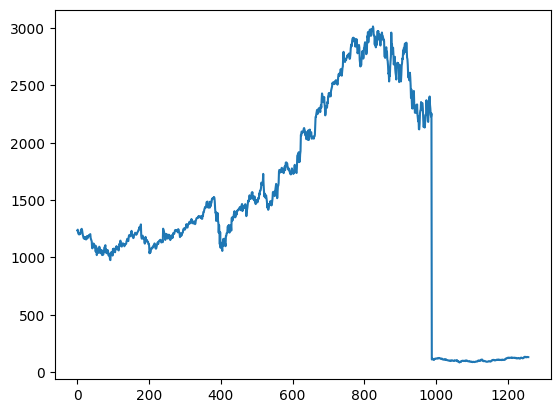

In [ ]:
# plot

import matplotlib.pyplot as plt
plt.plot(data)

In [ ]:
""" knowing that google underwent stocksplit. A stock split involves dividing
 the existing shares of a company into multiple new shares, while proportionally
  reducing the stock price. This means that the historical stock prices before
   the split are not directly comparable to the prices after the split."""

' knowing that google underwent stocksplit. A stock split involves dividing\n the existing shares of a company into multiple new shares, while proportionally\n  reducing the stock price. This means that the historical stock prices before\n   the split are not directly comparable to the prices after the split.'

In [ ]:
# so we need to adjust historical prices, basically scale the data
# according to the stock split ratio

# I'm assuming only 1 split, so considering GOOG went 3 splits I'm just doing
# it for 1 major split

split_date = '2022-07-18 00:00:00+00:00'

In [ ]:
data = df[['date', 'close']]

In [ ]:
data.head()

,date,close
0,2018-08-13 00:00:00+00:00,1235.01
1,2018-08-14 00:00:00+00:00,1242.10
2,2018-08-15 00:00:00+00:00,1214.38
3,2018-08-16 00:00:00+00:00,1206.49
4,2018-08-17 00:00:00+00:00,1200.96


In [ ]:
data['date'] = pd.to_datetime(data['date'])

<ipython-input-16-a011fda2e204>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['date'] = pd.to_datetime(data['date'])


In [ ]:
data['date'].head()

0   2018-08-13 00:00:00+00:00
1   2018-08-14 00:00:00+00:00
2   2018-08-15 00:00:00+00:00
3   2018-08-16 00:00:00+00:00
4   2018-08-17 00:00:00+00:00
Name: date, dtype: datetime64[ns, UTC]

In [ ]:
before_split = data[data['date'] < split_date]

In [ ]:
split_ratio = 20
adjustment_factor = 1 / split_ratio

In [ ]:
before_split['close'] = before_split['close'] * adjustment_factor

<ipython-input-20-61b784d60431>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  before_split['close'] = before_split['close'] * adjustment_factor


In [ ]:
before_split

,date,close
0,2018-08-13 00:00:00+00:00,61.7505
1,2018-08-14 00:00:00+00:00,62.1050
2,2018-08-15 00:00:00+00:00,60.7190
3,2018-08-16 00:00:00+00:00,60.3245
4,2018-08-17 00:00:00+00:00,60.0480
...,...,...
983,2022-07-11 00:00:00+00:00,116.5225
984,2022-07-12 00:00:00+00:00,114.8495
985,2022-07-13 00:00:00+00:00,112.1870
986,2022-07-14 00:00:00+00:00,111.4400


In [ ]:
before_split = pd.DataFrame(before_split)

after_split = data[data['date'] >= split_date]

after_split

,date,close
988,2022-07-18 00:00:00+00:00,109.91
989,2022-07-19 00:00:00+00:00,114.62
990,2022-07-20 00:00:00+00:00,114.70
991,2022-07-21 00:00:00+00:00,115.04
992,2022-07-22 00:00:00+00:00,108.36
...,...,...
1253,2023-08-07 00:00:00+00:00,131.94
1254,2023-08-08 00:00:00+00:00,131.84
1255,2023-08-09 00:00:00+00:00,130.15
1256,2023-08-10 00:00:00+00:00,130.21


In [ ]:
combined_df = pd.concat([before_split, after_split])

In [ ]:
combined_df

,date,close
0,2018-08-13 00:00:00+00:00,61.7505
1,2018-08-14 00:00:00+00:00,62.1050
2,2018-08-15 00:00:00+00:00,60.7190
3,2018-08-16 00:00:00+00:00,60.3245
4,2018-08-17 00:00:00+00:00,60.0480
...,...,...
1253,2023-08-07 00:00:00+00:00,131.9400
1254,2023-08-08 00:00:00+00:00,131.8400
1255,2023-08-09 00:00:00+00:00,130.1500
1256,2023-08-10 00:00:00+00:00,130.2100


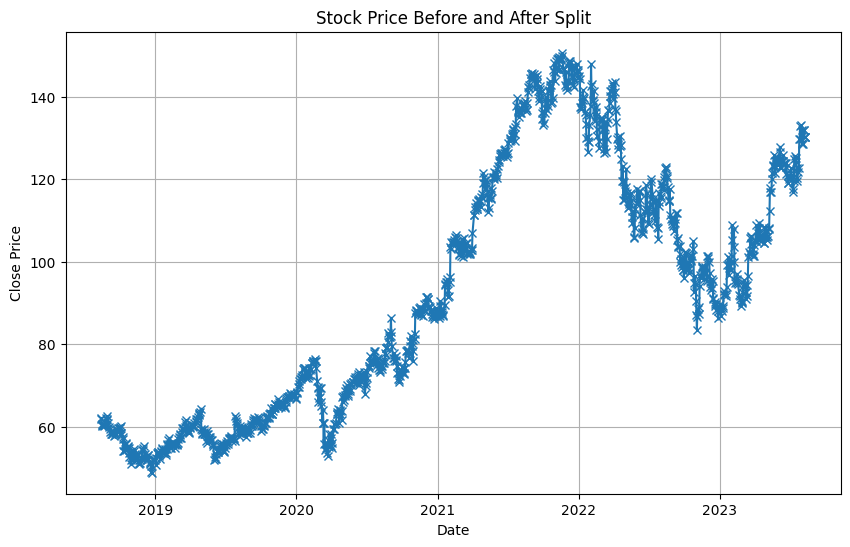

In [ ]:
# Plot

plt.figure(figsize=(10, 6))
plt.plot(combined_df['date'], combined_df['close'], marker='x')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Stock Price Before and After Split')
plt.grid(True)
plt.show()

In [ ]:
# We know LSTM is sensitive to scale of data, so we use minmax scaler

import numpy as np
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
combined_df['close'] = scaler.fit_transform(np.array(combined_df['close']).reshape(-1,1))

In [ ]:
combined_df['close']

0       0.126985
1       0.130464
2       0.116862
3       0.112990
4       0.110277
          ...   
1253    0.815806
1254    0.814825
1255    0.798239
1256    0.798828
1257    0.798436
Name: close, Length: 1258, dtype: float64

In [ ]:
# Train test split

# for time series data, we have 2 methods we can either take first 70% of data
# for train and remaining for test

# or we can take a fixd date and consider that as the split point
x = combined_df['close']

train_size = int(len(x)*0.70)
test_size = len(x)-train_size

train, test = x[0:train_size], x[train_size:len(x)]


In [ ]:
train.shape

(880,)

In [ ]:
test.shape

(378,)

In [ ]:
train

0      0.126985
1      0.130464
2      0.116862
3      0.112990
4      0.110277
         ...   
875    0.973773
876    0.920916
877    0.924503
878    0.884483
879    0.887181
Name: close, Length: 880, dtype: float64

In [ ]:
test

880     0.909164
881     0.881190
882     0.837298
883     0.848780
884     0.859826
          ...   
1253    0.815806
1254    0.814825
1255    0.798239
1256    0.798828
1257    0.798436
Name: close, Length: 378, dtype: float64

In [ ]:
train = np.array(train)
test = np.array(test)

In [ ]:
train

array([0.12698483, 0.1304638 , 0.11686196, 0.11299044, 0.11027694,
       0.11361852, 0.1106008 , 0.11340262, 0.11244578, 0.11993857,
       0.1303264 , 0.12509078, 0.13399674, 0.12900155, 0.11873148,
       0.10833382, 0.1031718 , 0.09579187, 0.09254843, 0.0924552 ,
       0.09869674, 0.09156215, 0.09770064, 0.09632672, 0.0882402 ,
       0.09077705, 0.09562013, 0.10336317, 0.0931667 , 0.0967389 ,
       0.10227384, 0.10023259, 0.1071758 , 0.1066017 , 0.10750456,
       0.10985986, 0.11125341, 0.09419714, 0.08887809, 0.08476614,
       0.07978567, 0.05152211, 0.05058981, 0.06568333, 0.05693439,
       0.07117902, 0.06843608, 0.05483425, 0.05900018, 0.0613064 ,
       0.06254784, 0.03655126, 0.05856347, 0.04673791, 0.02152152,
       0.0294363 , 0.04933855, 0.0460166 , 0.04002532, 0.03134016,
       0.03905376, 0.05749377, 0.05210112, 0.04412746, 0.03062376,
       0.02935779, 0.03309192, 0.04342087, 0.04184086, 0.02148227,
       0.02430862, 0.03012326, 0.02338613, 0.03552572, 0.03345

In [ ]:
# convert an array of values into a dataset matrix

def create_dataset(dataset, time_step=1):

	X, y = [], []

	for i in range(len(dataset)-time_step-1):

		a = dataset[i:(i+time_step)]
		X.append(a)
		y.append(dataset[i + time_step])
	return np.array(X), np.array(y)

In [ ]:
time_step = 100

tX, ty = create_dataset(train, time_step)
vX, vy = create_dataset(test, time_step)

In [ ]:
tX.shape

(779, 100)

In [ ]:
ty.shape

(779,)

In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM

tX = tX.reshape(tX.shape[0], tX.shape[1] , 1)
vX = vX.reshape(vX.shape[0], vX.shape[1] , 1)

In [ ]:
tX.ndim

3

In [ ]:
# Stacked LSTM model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))

model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(tX, ty, validation_data=(vX, vy), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
13/13 [==============================] - 12s 107ms/step - loss: 0.0992 - val_loss: 0.0049
Epoch 2/100
13/13 [==============================] - 0s 20ms/step - loss: 0.0105 - val_loss: 0.0157
Epoch 3/100
13/13 [==============================] - 0s 18ms/step - loss: 0.0033 - val_loss: 0.0055
Epoch 4/100
13/13 [==============================] - 0s 18ms/step - loss: 0.0022 - val_loss: 0.0045
Epoch 5/100
13/13 [==============================] - 0s 19ms/step - loss: 0.0017 - val_loss: 0.0039
Epoch 6/100
13/13 [==============================] - 0s 20ms/step - loss: 0.0016 - val_loss: 0.0039
Epoch 7/100
13/13 [==============================] - 0s 18ms/step - loss: 0.0016 - val_loss: 0.0044
Epoch 8/100
13/13 [==============================] - 0s 17ms/step - loss: 0.0016 - val_loss: 0.0042
Epoch 9/100
13/13 [==============================] - 0s 17ms/step - loss: 0.0015 - val_loss: 0.0041
Epoch 10/100
13/13 [==============================] - 0s 17ms/step - loss: 0.0015 - val_loss: 0.00

In [ ]:
train_predict = model.predict(tX)
test_predict = model.predict(vX)

9/9 [==============================] - 0s 6ms/step


In [ ]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

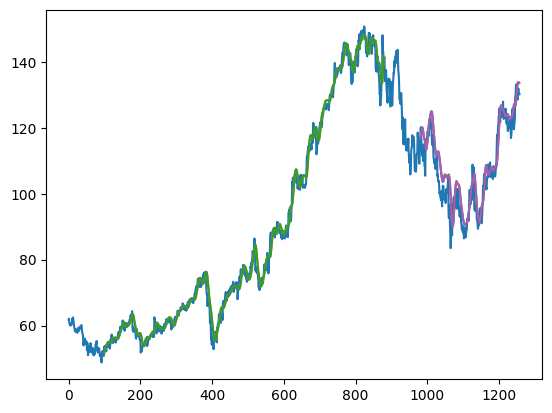

In [ ]:
look_back = 100

# Create arrays to hold predicted values, filling with NaNs initially
trainPredictPlot = np.empty_like(combined_df)
trainPredictPlot[:] = np.nan
testPredictPlot = np.empty_like(combined_df)
testPredictPlot[:] = np.nan

# Fill the trainPredictPlot array with predicted values from the training set
trainPredictPlot[look_back:len(train_predict) + look_back] = train_predict

# Fill the testPredictPlot array with predicted values from the testing set
testPredictPlot[len(train_predict) + (look_back * 2) + 1:len(combined_df) - 1] = test_predict

# Plot the original data, training predictions, and testing predictions
plt.plot(scaler.inverse_transform(np.array(combined_df['close']).reshape(-1,1))) # Plot the original data (inverse transformed)
plt.plot(trainPredictPlot)  # Plot the training predictions
plt.plot(testPredictPlot)  # Plot the testing predictions
plt.show()


In [ ]:
len(test)

378

In [ ]:
d1 = test[278:].reshape(1, -1)

In [ ]:
d1.shape

(100, 1)

In [53]:
d1

array([[0.55966751, 0.54376926, 0.56378928, 0.56182653, 0.53238533,
        0.51570198, 0.52100139, 0.51530943, 0.54161024, 0.55054074,
        0.55260162, 0.55093329, 0.58969754, 0.57056076, 0.56241536,
        0.55358299, 0.58272979, 0.59519323, 0.56535948, 0.55260162,
        0.55162025, 0.56025633, 0.56035447, 0.56889242, 0.54759662,
        0.54602642, 0.58449626, 0.5830242 , 0.5780192 , 0.56104143,
        0.56241536, 0.55348486, 0.56334766, 0.58322048, 0.58027635,
        0.62286797, 0.66820742, 0.67821743, 0.66879625, 0.69951324,
        0.71315433, 0.73317435, 0.73052464, 0.75623663, 0.73091719,
        0.71472453, 0.74131975, 0.75191859, 0.74416573, 0.73170229,
        0.74151603, 0.74995584, 0.76369507, 0.77625665, 0.72748238,
        0.72483268, 0.72679542, 0.74131975, 0.74210485, 0.74161416,
        0.75545153, 0.73847377, 0.73641288, 0.71099531, 0.73660916,
        0.72826748, 0.6896995 , 0.6889144 , 0.70922884, 0.69872814,
        0.70814933, 0.70412569, 0.72444013, 0.70

In [59]:
d2 = list(d1)

In [61]:
d2 = d2[0].tolist()

In [62]:
d2

[0.5596675106479028,
 0.5437692594555339,
 0.5637892794755541,
 0.5618265324147678,
 0.5323853265029737,
 0.5157019764862902,
 0.5210013935504132,
 0.5153094270741327,
 0.5416102376886691,
 0.5505407368152466,
 0.5526016212290723,
 0.5509332862274039,
 0.5896975406779328,
 0.5705607568352666,
 0.5624153565330037,
 0.5535829947594653,
 0.5827297886121414,
 0.5951932324481344,
 0.565359477124183,
 0.5526016212290723,
 0.5516202476986791,
 0.5602563347661387,
 0.560354472119178,
 0.5688924218335982,
 0.5475966162240671,
 0.5460264185754382,
 0.5844962609668491,
 0.5830242006712594,
 0.5780191956662544,
 0.5610414335904532,
 0.5624153565330037,
 0.553484857406426,
 0.5633476613868771,
 0.583220475377338,
 0.5802763547861587,
 0.622867966005221,
 0.668207423109384,
 0.678217433119394,
 0.6687962472276197,
 0.6995132387289251,
 0.7131543308013897,
 0.7331743508214097,
 0.7305246422893481,
 0.7562366287856483,
 0.7309171917015054,
 0.7147245284500185,
 0.7413197511236727,
 0.7519185852519186,

In [65]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(d2)>100):

        #print(d2)
        d1 = np.array(d2[1:])
        print("{} day input {}".format(i,d1))
        d1 = d1.reshape(1,-1)
        d1 = d1.reshape((1, n_steps, 1))

        #print(d1)
        yhat = model.predict(d1, verbose=0)
        print("{} day output {}".format(i,yhat))
        d2.extend(yhat[0].tolist())
        d2 = d2[1:]
        #print d2
        lst_output.extend(yhat.tolist())
        i=i+1

    else:
        d1 = d1.reshape((1, n_steps,1))
        yhat = model.predict(d1, verbose=0)
        print(yhat[0])
        d2.extend(yhat[0].tolist())
        print(len(d2))
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)

0 day input [0.54376926 0.56378928 0.56182653 0.53238533 0.51570198 0.52100139
 0.51530943 0.54161024 0.55054074 0.55260162 0.55093329 0.58969754
 0.57056076 0.56241536 0.55358299 0.58272979 0.59519323 0.56535948
 0.55260162 0.55162025 0.56025633 0.56035447 0.56889242 0.54759662
 0.54602642 0.58449626 0.5830242  0.5780192  0.56104143 0.56241536
 0.55348486 0.56334766 0.58322048 0.58027635 0.62286797 0.66820742
 0.67821743 0.66879625 0.69951324 0.71315433 0.73317435 0.73052464
 0.75623663 0.73091719 0.71472453 0.74131975 0.75191859 0.74416573
 0.73170229 0.74151603 0.74995584 0.76369507 0.77625665 0.72748238
 0.72483268 0.72679542 0.74131975 0.74210485 0.74161416 0.75545153
 0.73847377 0.73641288 0.71099531 0.73660916 0.72826748 0.6896995
 0.6889144  0.70922884 0.69872814 0.70814933 0.70412569 0.72444013
 0.70775678 0.70000393 0.66791301 0.67615655 0.69490078 0.74603034
 0.75456829 0.7482875  0.73867004 0.72591219 0.69401755 0.70167226
 0.71707982 0.72601032 0.79343069 0.79549157 0.8263

In [67]:
day_new = np.arange(1,101)
day_pred = np.arange(101,131)

In [99]:
len(lst_output)

30

In [68]:
len(data)

1258

In [76]:
combined_df

,date,close
0,2018-08-13 00:00:00+00:00,0.126985
1,2018-08-14 00:00:00+00:00,0.130464
2,2018-08-15 00:00:00+00:00,0.116862
3,2018-08-16 00:00:00+00:00,0.112990
4,2018-08-17 00:00:00+00:00,0.110277
...,...,...
1253,2023-08-07 00:00:00+00:00,0.815806
1254,2023-08-08 00:00:00+00:00,0.814825
1255,2023-08-09 00:00:00+00:00,0.798239
1256,2023-08-10 00:00:00+00:00,0.798828


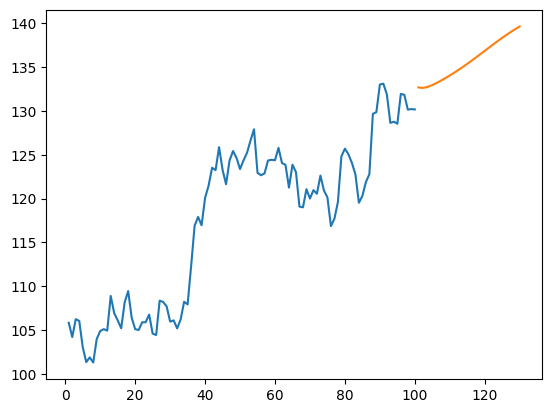

In [80]:
plt.plot(day_new,scaler.inverse_transform(np.array(combined_df['close'][1158:]).reshape(-1,1)))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

In [100]:
df3 = combined_df['close'].tolist()

In [101]:
df3[:10]

[0.1269848279652201,
 0.1304637971304637,
 0.11686195999921495,
 0.11299044142181386,
 0.1102769436102769,
 0.11361852048126547,
 0.1106007968753066,
 0.11340261830457904,
 0.11244577911244574,
 0.11993856601699743]

In [102]:
df3.extend(lst_output)

In [96]:
type(df3)

list

In [103]:
len(df3
)

1288

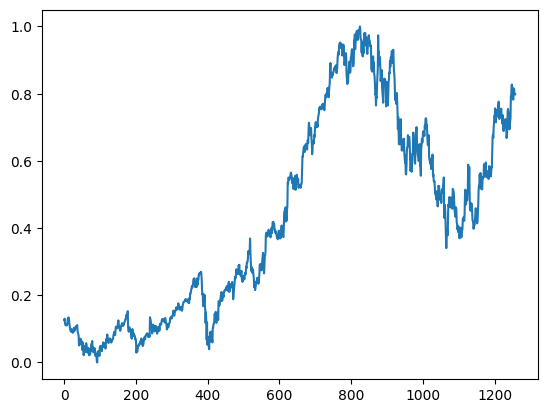

In [114]:
df3_numeric = [item for item in df3 if isinstance(item, (int, float))]
plt.plot(df3_numeric)

In [118]:
df4 = scaler.inverse_transform(np.array(df3_numeric).reshape(-1,1)).tolist()

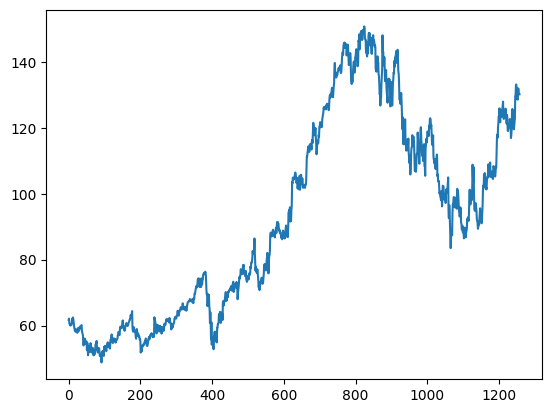

In [119]:
plt.plot(df4)